## Logica Fuzzy


#### SIstema automatizado para freios automotivos:
-VariáveisdeEntrada: Velocidade(km/h): 0<=v<=180 / 
Massa do veículo (ton): 0<=m<=2.4
                    
-VariáveldeSaída:Pressão no freio(atm)→ 0<=p<=1

### Instalando Pacote

In [100]:
!pip install scikit-fuzzy

### Importando os pacotes


In [101]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Criação Antecedent

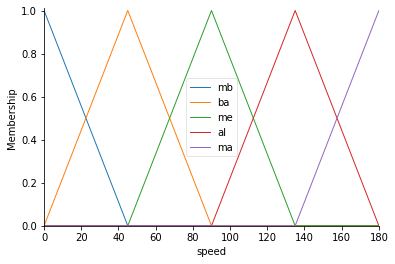

In [102]:
speed = ctrl.Antecedent(np.arange(0, 181, 1), "speed")
speed.automf(5, names=["mb", "ba", "me", "al", "ma"])
speed.view()

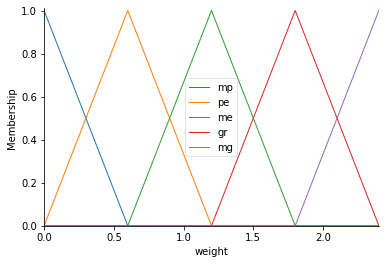

In [103]:
weight = ctrl.Antecedent(np.arange(0, 2.5, 0.6), "weight")
weight.automf(5, names=["mp", "pe", "me", "gr", "mg"])
weight.view()

### Criação Consequent

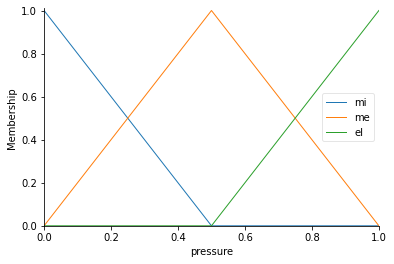

In [104]:
pressure = ctrl.Consequent(np.arange(0, 1.1, 0.1), "pressure")
pressure.automf(3, names=["mi", "me", "el"])
pressure.view()

### Criação Regras


In [109]:
rule1 = ctrl.Rule(speed["mb"] | weight['mp'], pressure["mi"])
rule2 = ctrl.Rule(speed["mb"] | weight['pe'], pressure["mi"])
rule3 = ctrl.Rule(speed["mb"] | weight['me'], pressure["mi"])
rule4 = ctrl.Rule(speed["mb"] | weight['gr'], pressure["me"])
rule5 = ctrl.Rule(speed["mb"] | weight['mg'], pressure ["me"])

rule6 = ctrl.Rule(speed["ba"] | weight['mp'], pressure["mi"])
rule7 = ctrl.Rule(speed["ba"] | weight['pe'], pressure["mi"])
rule8 = ctrl.Rule(speed["ba"] | weight['me'], pressure["mi"])
rule9 = ctrl.Rule(speed["ba"] | weight['gr'], pressure["me"])
rule10 = ctrl.Rule(speed["ba"] | weight['mg'], pressure["me"])

rule11 = ctrl.Rule(speed["me"] | weight['mp'], pressure["mi"])
rule12 = ctrl.Rule(speed["me"] | weight['pe'], pressure["mi"])
rule13 = ctrl.Rule(speed["me"] | weight['me'], pressure["me"])
rule14 = ctrl.Rule(speed["me"] | weight['gr'], pressure["el"])
rule15 = ctrl.Rule(speed["me"] | weight['mg'], pressure["el"])

rule16 = ctrl.Rule(speed["al"] | weight['mp'], pressure["me"])
rule17 = ctrl.Rule(speed["al"] |weight['pe'], pressure["me"])
rule18 = ctrl.Rule(speed["al"] | weight['me'], pressure["me"])
rule19 = ctrl.Rule(speed["al"] | weight['gr'], pressure["el"])
rule20 = ctrl.Rule(speed["al"] | weight['mg'], pressure["el"])

rule21 = ctrl.Rule(speed["ma"] | weight['mp'], pressure["me"])
rule22 = ctrl.Rule(speed["ma"] | weight['pe'], pressure["me"])
rule23 = ctrl.Rule(speed["ma"] | weight['me'], pressure["me"])
rule24 = ctrl.Rule(speed["ma"] | weight['gr'], pressure["el"])
rule25 = ctrl.Rule(speed["ma"] | weight['mg'], pressure["el"])

### Criando Sistema


In [110]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [111]:
tipping.input["weight"] = 1.5
tipping.input["speed"] = 155

tipping.compute()

0.51 atm


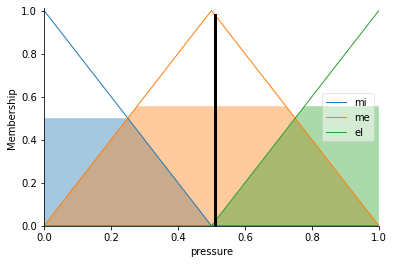

In [112]:
ans = tipping.output["pressure"]
print("%.2f atm" %ans)
pressure.view(sim=tipping)